#ML Lab Exam

#Importing Libraries

In [1]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255318 sha256=6dd40e5c23207215aa5fc2ea31dc720a0ef9f13aacc3b95868b79a64e1416802
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [2]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle5 as pickle
import scipy.sparse

#preprocessing and scoring
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from nltk.stem import WordNetLemmatizer

#models and algos
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

In [3]:
#Pipeline function
from sklearn.base import BaseEstimator, TransformerMixin

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

In [4]:
#nltk
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

In [6]:
from wordcloud import WordCloud

#Creating Datasets

In [7]:
from google.colab import drive
drive.mount('/content/drive') #force_remount=True

Mounted at /content/drive


In [8]:
import zipfile

zip_path = '/content/drive/MyDrive/KaggleDatasets/twitterData.zip'
unzip_path = '/content/drive/MyDrive/KaggleDatasets/twitterData/'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

In [9]:
csv_file_path1 = '/content/drive/MyDrive/KaggleDatasets/twitterData/testdata.manual.2009.06.14.csv'
sentiment140 = pd.read_csv(csv_file_path1, encoding="Latin-1" ,names=["polarity","id", "date","query", "user", "tweet"])

csv_file_path2 = '/content/drive/MyDrive/KaggleDatasets/twitterData/training.1600000.processed.noemoticon.csv'
train = pd.read_csv(csv_file_path2, encoding="Latin-1" ,names=["polarity","id", "date","query", "user", "tweet"])

In [10]:
train.head()

,polarity,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   user      1600000 non-null  object
 5   tweet     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [12]:
sentiment140.head()

,polarity,id,date,query,user,tweet
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [13]:
sentiment140.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  498 non-null    int64 
 1   id        498 non-null    int64 
 2   date      498 non-null    object
 3   query     498 non-null    object
 4   user      498 non-null    object
 5   tweet     498 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.5+ KB


In [14]:
custom_palette = ["red", "green","blue"]

<ipython-input-15-94dae2869065>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data = train , x = "polarity", hue="polarity", palette=custom_palette, legend=False)


<Axes: xlabel='polarity', ylabel='count'>

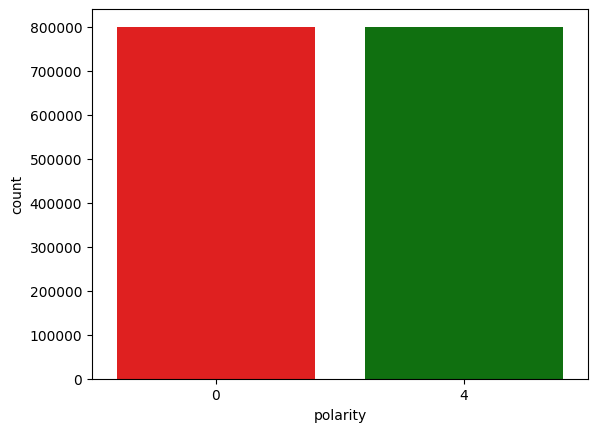

In [15]:
sns.countplot(data = train , x = "polarity", hue="polarity", palette=custom_palette, legend=False)

<Axes: xlabel='polarity', ylabel='count'>

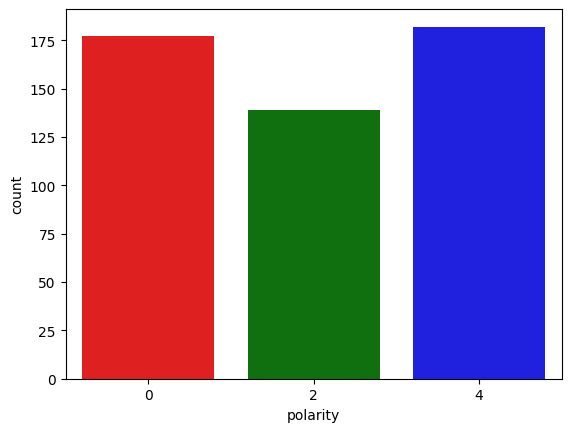

In [16]:
sns.countplot(data = sentiment140 , x = "polarity", hue="polarity", palette=custom_palette, legend=False)

In [17]:
#Replace values to have -1 negative, 0 neutral, 1 postive
train["polarity"]  = train["polarity"].replace(4,1)
train["polarity"]  = train["polarity"].replace(0,-1)

sentiment140["polarity"]  = sentiment140["polarity"].replace(4,1)
sentiment140["polarity"]  = sentiment140["polarity"].replace(0,-1)
sentiment140["polarity"]  = sentiment140["polarity"].replace(2,0)

In [18]:
print("train: ", len(train))
print("sentiment140: ", len(sentiment140))

train:  1600000
sentiment140:  498


In [19]:
#Combining datasets
tweets_df = pd.concat([train,sentiment140],axis=0)

<Axes: xlabel='polarity', ylabel='count'>

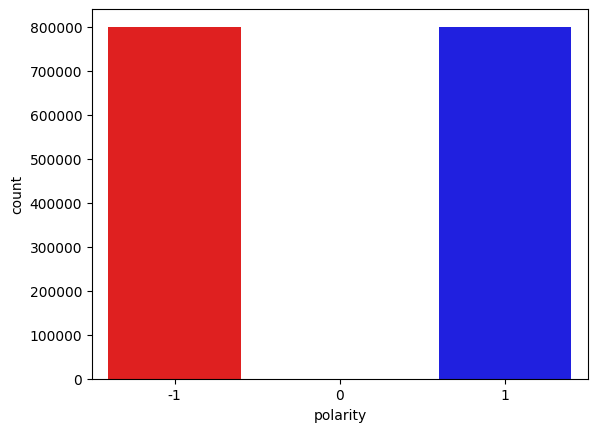

In [20]:
sns.countplot(data = tweets_df , x = "polarity", hue="polarity", palette=custom_palette, legend=False)

#Visualize Trends in Sentiment Over Time

<ipython-input-21-28e5f87119c9>:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')


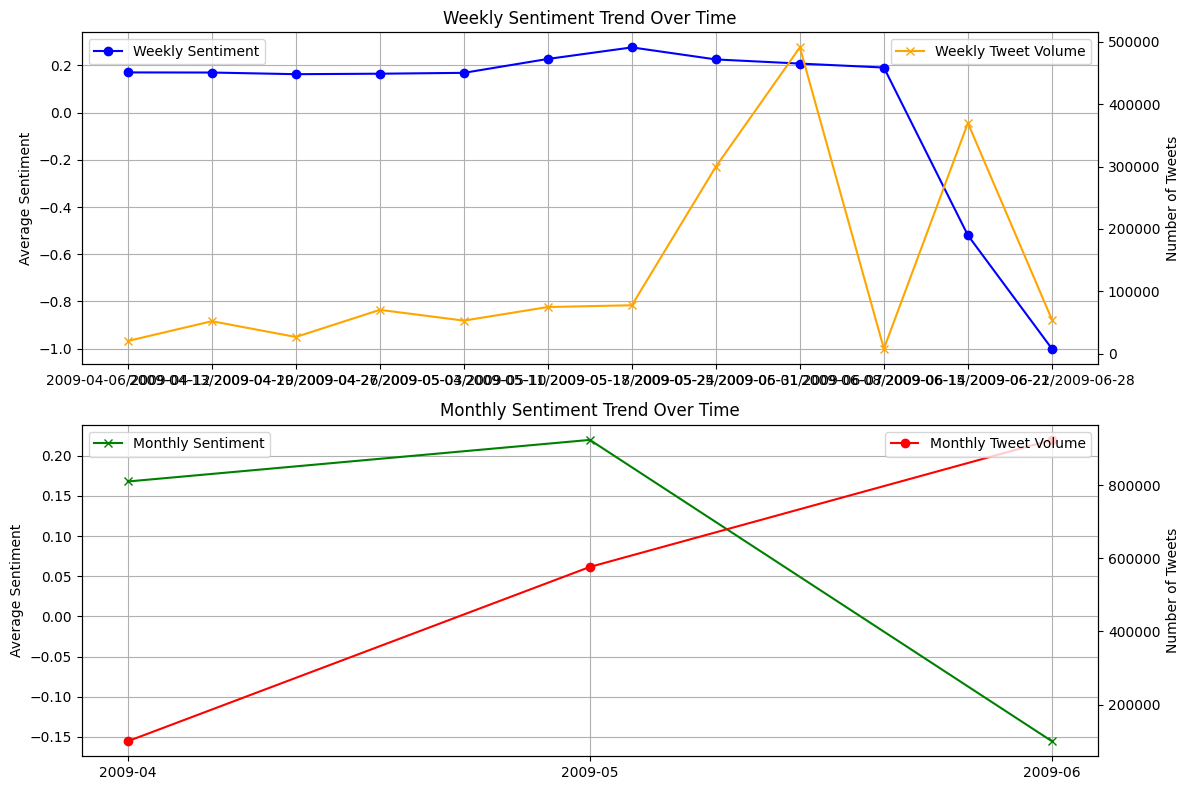

In [21]:
# Convert 'date' column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

# Group by week to get average sentiment per week and tweet volume
tweets_df['week'] = tweets_df['date'].dt.to_period('W')
weekly_sentiment = tweets_df.groupby('week')['polarity'].mean()
weekly_tweet_volume = tweets_df.groupby('week')['tweet'].size()

# Group by month to get average sentiment per month and tweet volume
tweets_df['month'] = tweets_df['date'].dt.to_period('M')
monthly_sentiment = tweets_df.groupby('month')['polarity'].mean()
monthly_tweet_volume = tweets_df.groupby('month')['tweet'].size()

# Plot the sentiment trends with tweet volume
plt.figure(figsize=(12, 8))

# Plot weekly sentiment trend
plt.subplot(2, 1, 1)
plt.plot(weekly_sentiment.index.astype(str), weekly_sentiment.values, color='blue', marker='o', label='Weekly Sentiment')
plt.ylabel('Average Sentiment')
plt.title('Weekly Sentiment Trend Over Time')
plt.grid(True)
plt.legend(loc='upper left')

# Plot weekly tweet volume
plt.twinx()  # This creates a second y-axis for tweet volume
plt.plot(weekly_tweet_volume.index.astype(str), weekly_tweet_volume.values, color='orange', marker='x', label='Weekly Tweet Volume')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')

# Plot monthly sentiment trend
plt.subplot(2, 1, 2)
plt.plot(monthly_sentiment.index.astype(str), monthly_sentiment.values, color='green', marker='x', label='Monthly Sentiment')
plt.ylabel('Average Sentiment')
plt.title('Monthly Sentiment Trend Over Time')
plt.grid(True)
plt.legend(loc='upper left')

# Plot monthly tweet volume
plt.twinx()
plt.plot(monthly_tweet_volume.index.astype(str), monthly_tweet_volume.values, color='red', marker='o', label='Monthly Tweet Volume')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

#Top Influencers

In [22]:
# Group by user to calculate average sentiment and tweet volume
user_sentiment = tweets_df.groupby('user').agg(
    polarity_mean=('polarity', 'mean'),
    tweet_count=('tweet', 'size')
)

# Calculate a "sentiment score" that factors in both polarity and volume
user_sentiment['influence_score'] = user_sentiment['polarity_mean'] * user_sentiment['tweet_count']

# Sort by influence score to get the top influencers (both high sentiment and tweet volume)
top_influencers = user_sentiment.sort_values(by='influence_score', ascending=False).head(10)

# Display the top influencers
print("Top 10 Influencers (based on polarity and tweet volume):")
print(top_influencers[['polarity_mean', 'tweet_count', 'influence_score']])

Top 10 Influencers (based on polarity and tweet volume):
                polarity_mean  tweet_count  influence_score
user                                                       
what_bugs_u          1.000000          246            246.0
DarkPiano            0.957627          236            226.0
keza34               0.926941          219            203.0
shanajaca            0.915493          213            195.0
tsarnick             0.709677          248            176.0
TraceyHewins         0.829384          211            175.0
KevinEdwardsJr       1.000000          171            171.0
ramdomthoughts       0.759259          216            164.0
Scyranth             0.951807          166            158.0
VioletsCRUK          0.562724          279            157.0


Removing unwanted columns

In [23]:
tweets_df = tweets_df[["polarity", "tweet"]]

#Understanding Length and Polarity

In [24]:
tweets_df["tweet"] = tweets_df["tweet"].astype(str)
tweets_df.reset_index(drop = True,inplace=True)

In [25]:
tweets_df["length"] = tweets_df["tweet"].apply(len)
tweets_df.groupby("polarity")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
polarity,,,,,,,,
-1,800177.0,74.304081,36.743642,6.0,44.0,70.0,104.0,359.0
0,139.0,72.517986,32.992391,11.0,48.0,69.0,95.0,144.0
1,800182.0,73.880350,36.135391,6.0,44.0,69.0,103.0,374.0


<Figure size 1500x500 with 0 Axes>

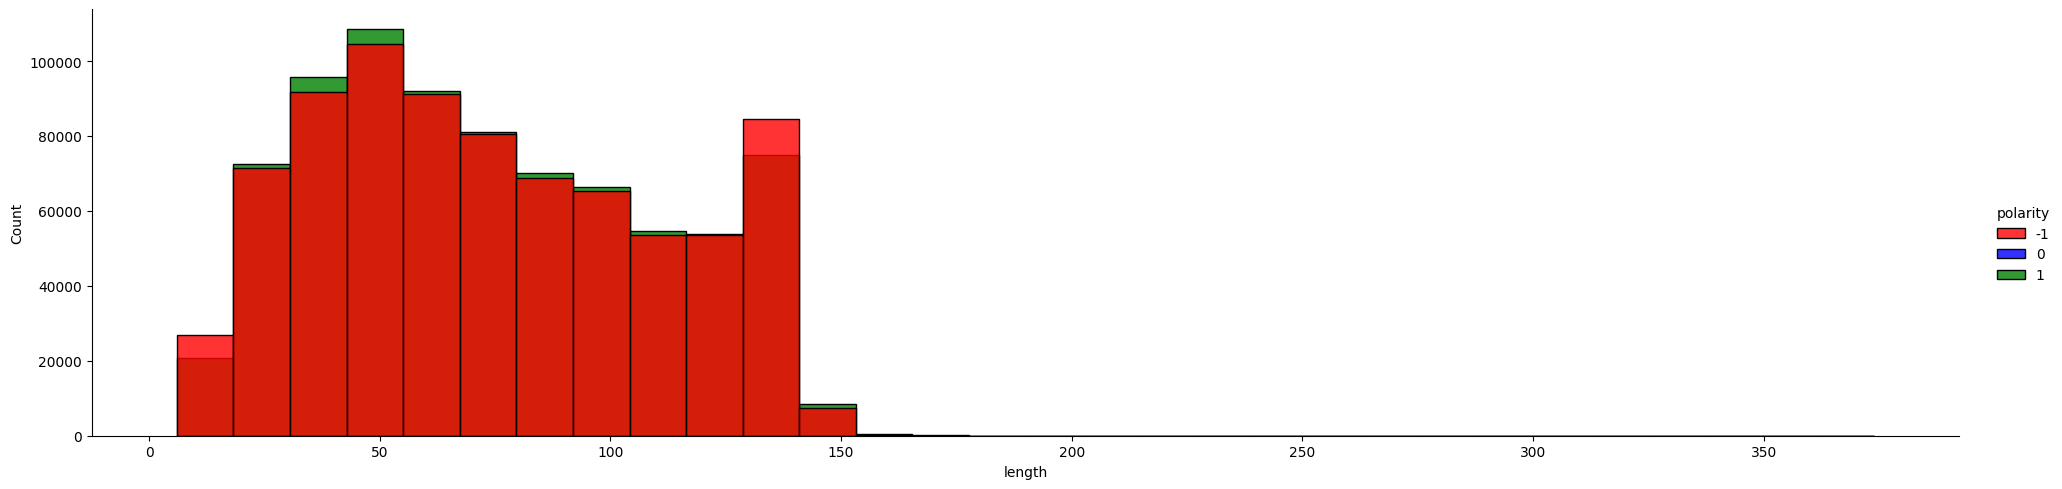

In [26]:
plt.figure(figsize=(15,5))

sns.displot(data = tweets_df, x= "length", hue= "polarity" ,palette={-1:"r",0:"b",1:"g"}, bins = 30,aspect= 4, alpha = 0.8)

#Cleaning tweets

In [27]:
def clean_text(text):
    pat1 = r'@[^ ]+'                   # @ signs and value
    pat2 = r'https?://[A-Za-z0-9./]+'  # links
    pat3 = r'\'s'                      # floating s's
    pat4 = r'\#\w+'                     # hashtags and value
    pat5 = r'&amp '                 # & and
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [28]:
#clean
tweets_df["cleaned_tweet"] = tweets_df["tweet"].apply(clean_text)

In [29]:
#drop empty
tweets_df = tweets_df [ ~(tweets_df["cleaned_tweet"] =="")]

Lemmetization

In [30]:
lem = WordNetLemmatizer()

def tokenize_lem(sentence):
    outlist= []
    token = sentence.split()
    for tok in token:
        outlist.append(lem.lemmatize(tok))
    return " ".join(outlist)

In [31]:
%%time
tweets_df["cleaned_tweet"] = tweets_df["cleaned_tweet"].apply(tokenize_lem)

CPU times: user 1min 44s, sys: 780 ms, total: 1min 44s
Wall time: 1min 48s


In [32]:
tweets_df.head()

,polarity,tweet,length,cleaned_tweet
0,-1,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that a bummer you shoulda got david carr ...
1,-1,is upset that he can't update his Facebook by ...,111,is upset that he cant update his facebook by t...
2,-1,@Kenichan I dived many times for the ball. Man...,89,i dived many time for the ball managed to save...
3,-1,my whole body feels itchy and like its on fire,47,my whole body feel itchy and like it on fire
4,-1,"@nationwideclass no, it's not behaving at all....",111,no it not behaving at all im mad why am i here...


In [33]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596552 entries, 0 to 1600497
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   polarity       1596552 non-null  int64 
 1   tweet          1596552 non-null  object
 2   length         1596552 non-null  int64 
 3   cleaned_tweet  1596552 non-null  object
dtypes: int64(2), object(2)
memory usage: 60.9+ MB


Split Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(tweets_df[["cleaned_tweet","length"]], tweets_df["polarity"], test_size=0.2, random_state=42)

#TF-IDF

In [35]:
tfidf = TfidfVectorizer()

In [36]:
tfidf.fit(X_train["cleaned_tweet"])

TfidfVectorizer()

In [37]:
with open("tfidf_vectorizer.pickle", "wb") as f:
    pickle.dump(tfidf, f)

In [38]:
X_train_v = tfidf.transform(X_train["cleaned_tweet"])
X_test_v = tfidf.transform(X_test["cleaned_tweet"])

In [39]:
print(X_train_v.shape)
print(X_test_v.shape)

(1277241, 344343)
(319311, 344343)


In [40]:
#Add TFIDF to tweets vector and Scaling
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()

In [41]:
scaler.fit([X_train["length"]])
scaler2.fit([X_test["length"]])

MinMaxScaler()

In [42]:
X_train_len = scaler.transform([X_train["length"]])
X_train_len = X_train_len.reshape( X_train_v.shape[0], 1)

X_train = scipy.sparse.hstack([X_train_v,X_train_len], format = "csr")

In [43]:
X_test_len = scaler2.transform([X_test["length"]])
X_test_len = X_test_len.reshape(X_test_v.shape[0], 1)

X_test = scipy.sparse.hstack([X_test_v,X_test_len], format = "csr")

#Word Cloud

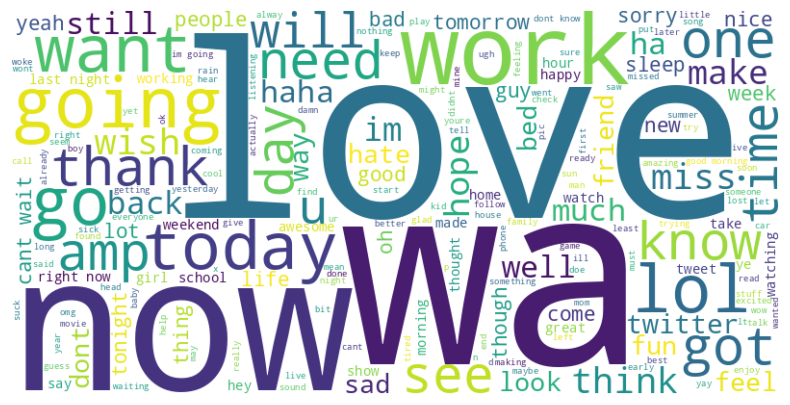

In [44]:
# Generate a Word Cloud for all the tweets
text = ' '.join(tweets_df['cleaned_tweet'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Topic Model (LDA)

In [45]:
lda = LatentDirichletAllocation(n_components=5, max_iter=5, batch_size=128, random_state=42, verbose=2)

# Fit the LDA model to the TF-IDF matrix (X_train_v)
lda.fit(X_train_v)

# Get the feature names (terms/words) from the TF-IDF vectorizer
terms = tfidf.get_feature_names_out()

# Display the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Topic #0:
to my the good you and is it for im
Topic #1:
the you to my it and is that im thank
Topic #2:
to the it my and is that in have you
Topic #3:
to it the you for my thanks is work me
Topic #4:
the to it you and in of my is for


#Topic Model

Topic 1: good, morning, night, luck, time, hope, feel, sound, thing, sleep
Topic 2: im, going, sorry, gonna, tired, sad, sure, miss, think, right
Topic 3: just, wa, like, dont, got, know, want, lol, time, really
Topic 4: day, work, today, going, tomorrow, happy, great, school, mother, hope
Topic 5: love, thanks, miss, song, new, haha, great, lol, guy, follow


<ipython-input-46-b58772c27762>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(n_topics), y=topic_distribution.flatten(), palette='viridis')


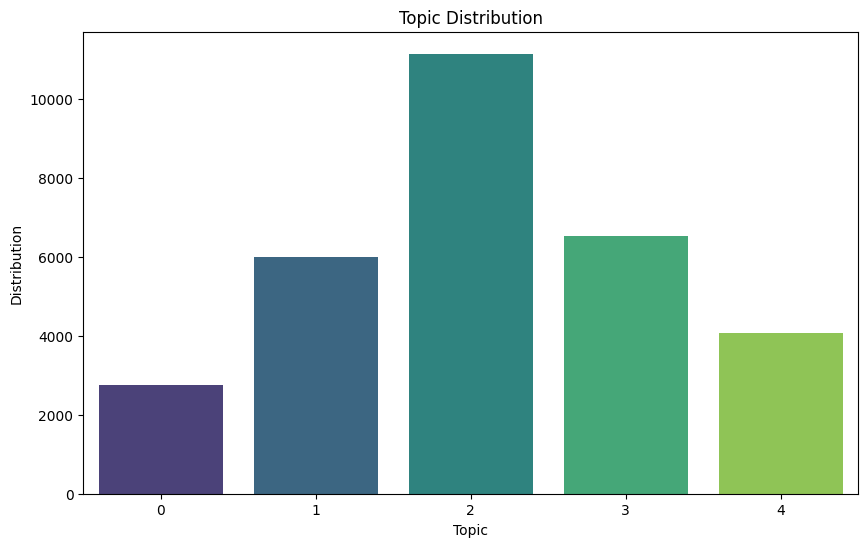

In [46]:
from sklearn.decomposition import NMF

X = tweets_df['cleaned_tweet']  # Assuming cleaned tweets

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(X)

# Fit NMF for topic modeling
n_topics = 5  # Set number of topics to identify
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(X_tfidf)

# Get top words for each topic
feature_names = tfidf.get_feature_names_out()
n_top_words = 10  # Top 10 words per topic
topics = []

for topic_idx, topic in enumerate(nmf.components_):
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(f"Topic {topic_idx + 1}: " + ", ".join(top_words))

# Print the topics
for topic in topics:
    print(topic)

# Optional: Plot the topic distribution
topic_values = nmf.transform(X_tfidf)
topic_distribution = topic_values.sum(axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=range(n_topics), y=topic_distribution.flatten(), palette='viridis')
plt.title("Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Distribution")
plt.show()

#Clustering

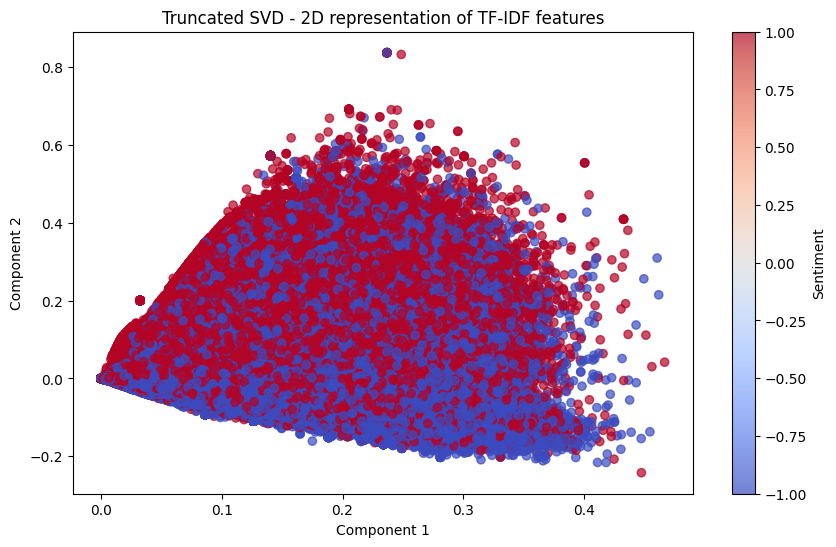

In [47]:
svd = TruncatedSVD(n_components=2, random_state=42)

# Fit and transform the TF-IDF matrix to reduce dimensions
X_train_svd = svd.fit_transform(X_train_v)

# Optional: Plotting the 2D representation
plt.figure(figsize=(10, 6))
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("Truncated SVD - 2D representation of TF-IDF features")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Sentiment')
plt.show()

#GridSearchCV

In [48]:
kfold =StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [49]:
model_score = pd.DataFrame(columns=["model_f1_train","params_used", "f1","precision","recall"])

def model_prediction(model, params):
    global X_train, y_train, X_test, y_test

    model = GridSearchCV(model, param_grid= params, cv= kfold, verbose = 2)
    print("\n\nMODEL: ", type(model.estimator).__name__)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print ("Model and params: ", model.best_estimator_, model.best_params_)
    print("\n")
    print("Train score: ", model.best_score_)
    print("test score: ",accuracy_score(y_test,y_pred))
    print("\n")
    print("Test Report:")
    print(classification_report(y_test,y_pred))
    return y_pred, model

In [50]:
def model_scoring(y_pred, model):
    global y_test
    global model_score

    df = pd.DataFrame(data = [[model.best_score_,
                           model.best_params_,
                           f1_score(y_test,y_pred,average="macro"),
                           precision_score(y_test,y_pred,average="macro"),
                           recall_score(y_test,y_pred,average="macro")
                          ]] ,
                  columns =model_score.columns,
                  index=[str(model.best_estimator_)])
    #model_score = model_score.append ( df )
    model_score = pd.concat([model_score, df])

In [51]:
#Set Parameters
gen_params = {"alpha":[1,3]}
logr_params = {
    "penalty": ["l2"],
    "C": [5],
    "max_iter": [10000]
}

In [52]:
#Instantiate
vader = SentimentIntensityAnalyzer()
#textblob does not required instantiation

##Using 2 models due to paucity of time
naivebern_i = BernoulliNB()
logr_i = LogisticRegression(solver="sag")

In [53]:
naivebern_pred, naivebern_m = model_prediction(naivebern_i, gen_params)
log_pred , logr_m = model_prediction(logr_i,logr_params)



MODEL:  BernoulliNB
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ............................................alpha=1; total time=   0.8s
[CV] END ............................................alpha=1; total time=   0.7s
[CV] END ............................................alpha=1; total time=   0.7s
[CV] END ............................................alpha=1; total time=   0.7s
[CV] END ............................................alpha=1; total time=   0.7s
[CV] END ............................................alpha=3; total time=   0.7s
[CV] END ............................................alpha=3; total time=   0.7s
[CV] END ............................................alpha=3; total time=   0.7s
[CV] END ............................................alpha=3; total time=   0.8s
[CV] END ............................................alpha=3; total time=   1.0s
Model and params:  BernoulliNB(alpha=3) {'alpha': 3}


Train score:  0.779100420323714
test score:  0.778601

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          -1       0.78      0.78      0.78    158927
           0       0.00      0.00      0.00        29
           1       0.78      0.78      0.78    160355

    accuracy                           0.78    319311
   macro avg       0.52      0.52      0.52    319311
weighted avg       0.78      0.78      0.78    319311



MODEL:  LogisticRegression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................C=5, max_iter=10000, penalty=l2; total time= 1.2min
[CV] END ....................C=5, max_iter=10000, penalty=l2; total time= 1.3min
[CV] END ....................C=5, max_iter=10000, penalty=l2; total time= 1.3min
[CV] END ....................C=5, max_iter=10000, penalty=l2; total time= 1.2min
[CV] END ....................C=5, max_iter=10000, penalty=l2; total time= 1.2min
Model and params:  LogisticRegression(C=5, max_iter=10000, solver='sag') {'C': 5, 'max_iter': 10000, 'penalty': 'l2'}


Train 

In [54]:
model_scoring(naivebern_pred, naivebern_m)
model_scoring(log_pred, logr_m)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-50-8c64bd3d644d>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_score = pd.concat([model_score, df])


In [55]:
model_score

,model_f1_train,params_used,f1,precision,recall
BernoulliNB(alpha=3),0.77910,{'alpha': 3},0.519086,0.519067,0.519108
"LogisticRegression(C=5, max_iter=10000, solver='sag')",0.79237,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2'}",0.571216,0.861556,0.551210


Vader

In [56]:
def out_box_vader(x):
    x = vader.polarity_scores(x)["compound"]
    if x >0:
        x = 1
    elif x<0:
        x = -1
    else:
        x= 0
    return x

In [57]:
def out_box_score(y_true, prediction, name):
    global model_score
    df = pd.DataFrame(data = [[0,
                               0,
                               f1_score(y_true,prediction,average="macro"),
                               precision_score(y_true,prediction,average="macro"),
                               recall_score(y_true,prediction,average="macro")
                              ]] ,
                      columns=model_score.columns,
                      index=[name])
    model_score = pd.concat([model_score, df])

In [58]:
%%time
vader_pred = tweets_df["cleaned_tweet"].apply(out_box_vader)
out_box_score(tweets_df["polarity"],vader_pred, "Vader")

CPU times: user 5min 6s, sys: 844 ms, total: 5min 7s
Wall time: 5min 10s


In [59]:
model_score

,model_f1_train,params_used,f1,precision,recall
BernoulliNB(alpha=3),0.77910,{'alpha': 3},0.519086,0.519067,0.519108
"LogisticRegression(C=5, max_iter=10000, solver='sag')",0.79237,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2'}",0.571216,0.861556,0.551210
Vader,0.00000,0,0.400271,0.483946,0.576141


#Saving Model

In [60]:
model_dict = {
    logr_m : "logr_m",
    naivebern_m:"naivebern_m"
             }
for m in model_dict.items():
    file = open(f'{m[1]}.pickle','wb')
    pickle.dump(m[0], file)
    file.close()

In [61]:
## save vocabulary
with open("vocabulary","wb") as f:
    pickle.dump(tfidf.vocabulary_,f)
    f.close()

#Pipeline

In [62]:
from sklearn.pipeline import Pipeline

X = tweets_df["cleaned_tweet"]
y = tweets_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
pipe = Pipeline(steps = [
    ("tfidf", TfidfVectorizer()),
    ("logr" , GridSearchCV(logr_i, param_grid= logr_params, cv= kfold))
    ]
                )

In [64]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logr',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                              estimator=LogisticRegression(solver='sag'),
                              param_grid={'C': [5], 'max_iter': [10000],
                                          'penalty': ['l2']}))])

In [65]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.85      0.85      0.85    238858
           0       1.00      0.22      0.36        45
           1       0.85      0.85      0.85    240063

    accuracy                           0.85    478966
   macro avg       0.90      0.64      0.69    478966
weighted avg       0.85      0.85      0.85    478966



In [66]:
#Save Pipeline
file = open('pipemodel_model.pickle','wb')
pickle.dump(pipe, file)
file.close()

Thus, Logistic Regression seems to have slightly better accuracy than Bernoulli Naive Bayes model for the given dataset.

# ---------------END------------------